In [7]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from math import pi
from pandas.plotting import parallel_coordinates
plt.rcParams['figure.dpi'] = 300

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umutalpaydn/nba-20202021-season-player-stats")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\umutalpaydn\nba-20202021-season-player-stats\versions\1


In [9]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/umutalpaydn/nba-20202021-season-player-stats
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/umutalpaydn/nba-20202021-season-player-stats/versions/1/nba2021_advanced.csv")

# 데이터 샘플 확인
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [ ]:
# 히트맵 시각화 V1을 위한 데이터 전처리

# 변수 TM의 고유값 중에서 5개 팀에 속한 선수만 필터링
df1 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])] # Tm 컬럼에서 ATL, BOS, BRK, CHI, CHO 팀만 필터링

# 6개 컬럼만 필터링 
df1 = df1[['Tm', 'ORB%','TRB%','AST%','BLK%','USG%']] # Tm, ORB%, TRB%, AST%, BLK%, USG% 컬럼만 필터링

#  팀 별 요소 평균 전처리
df1 = df1.groupby('Tm').mean() # Tm 컬럼을 기준으로 그룹화하여 평균값 계산
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


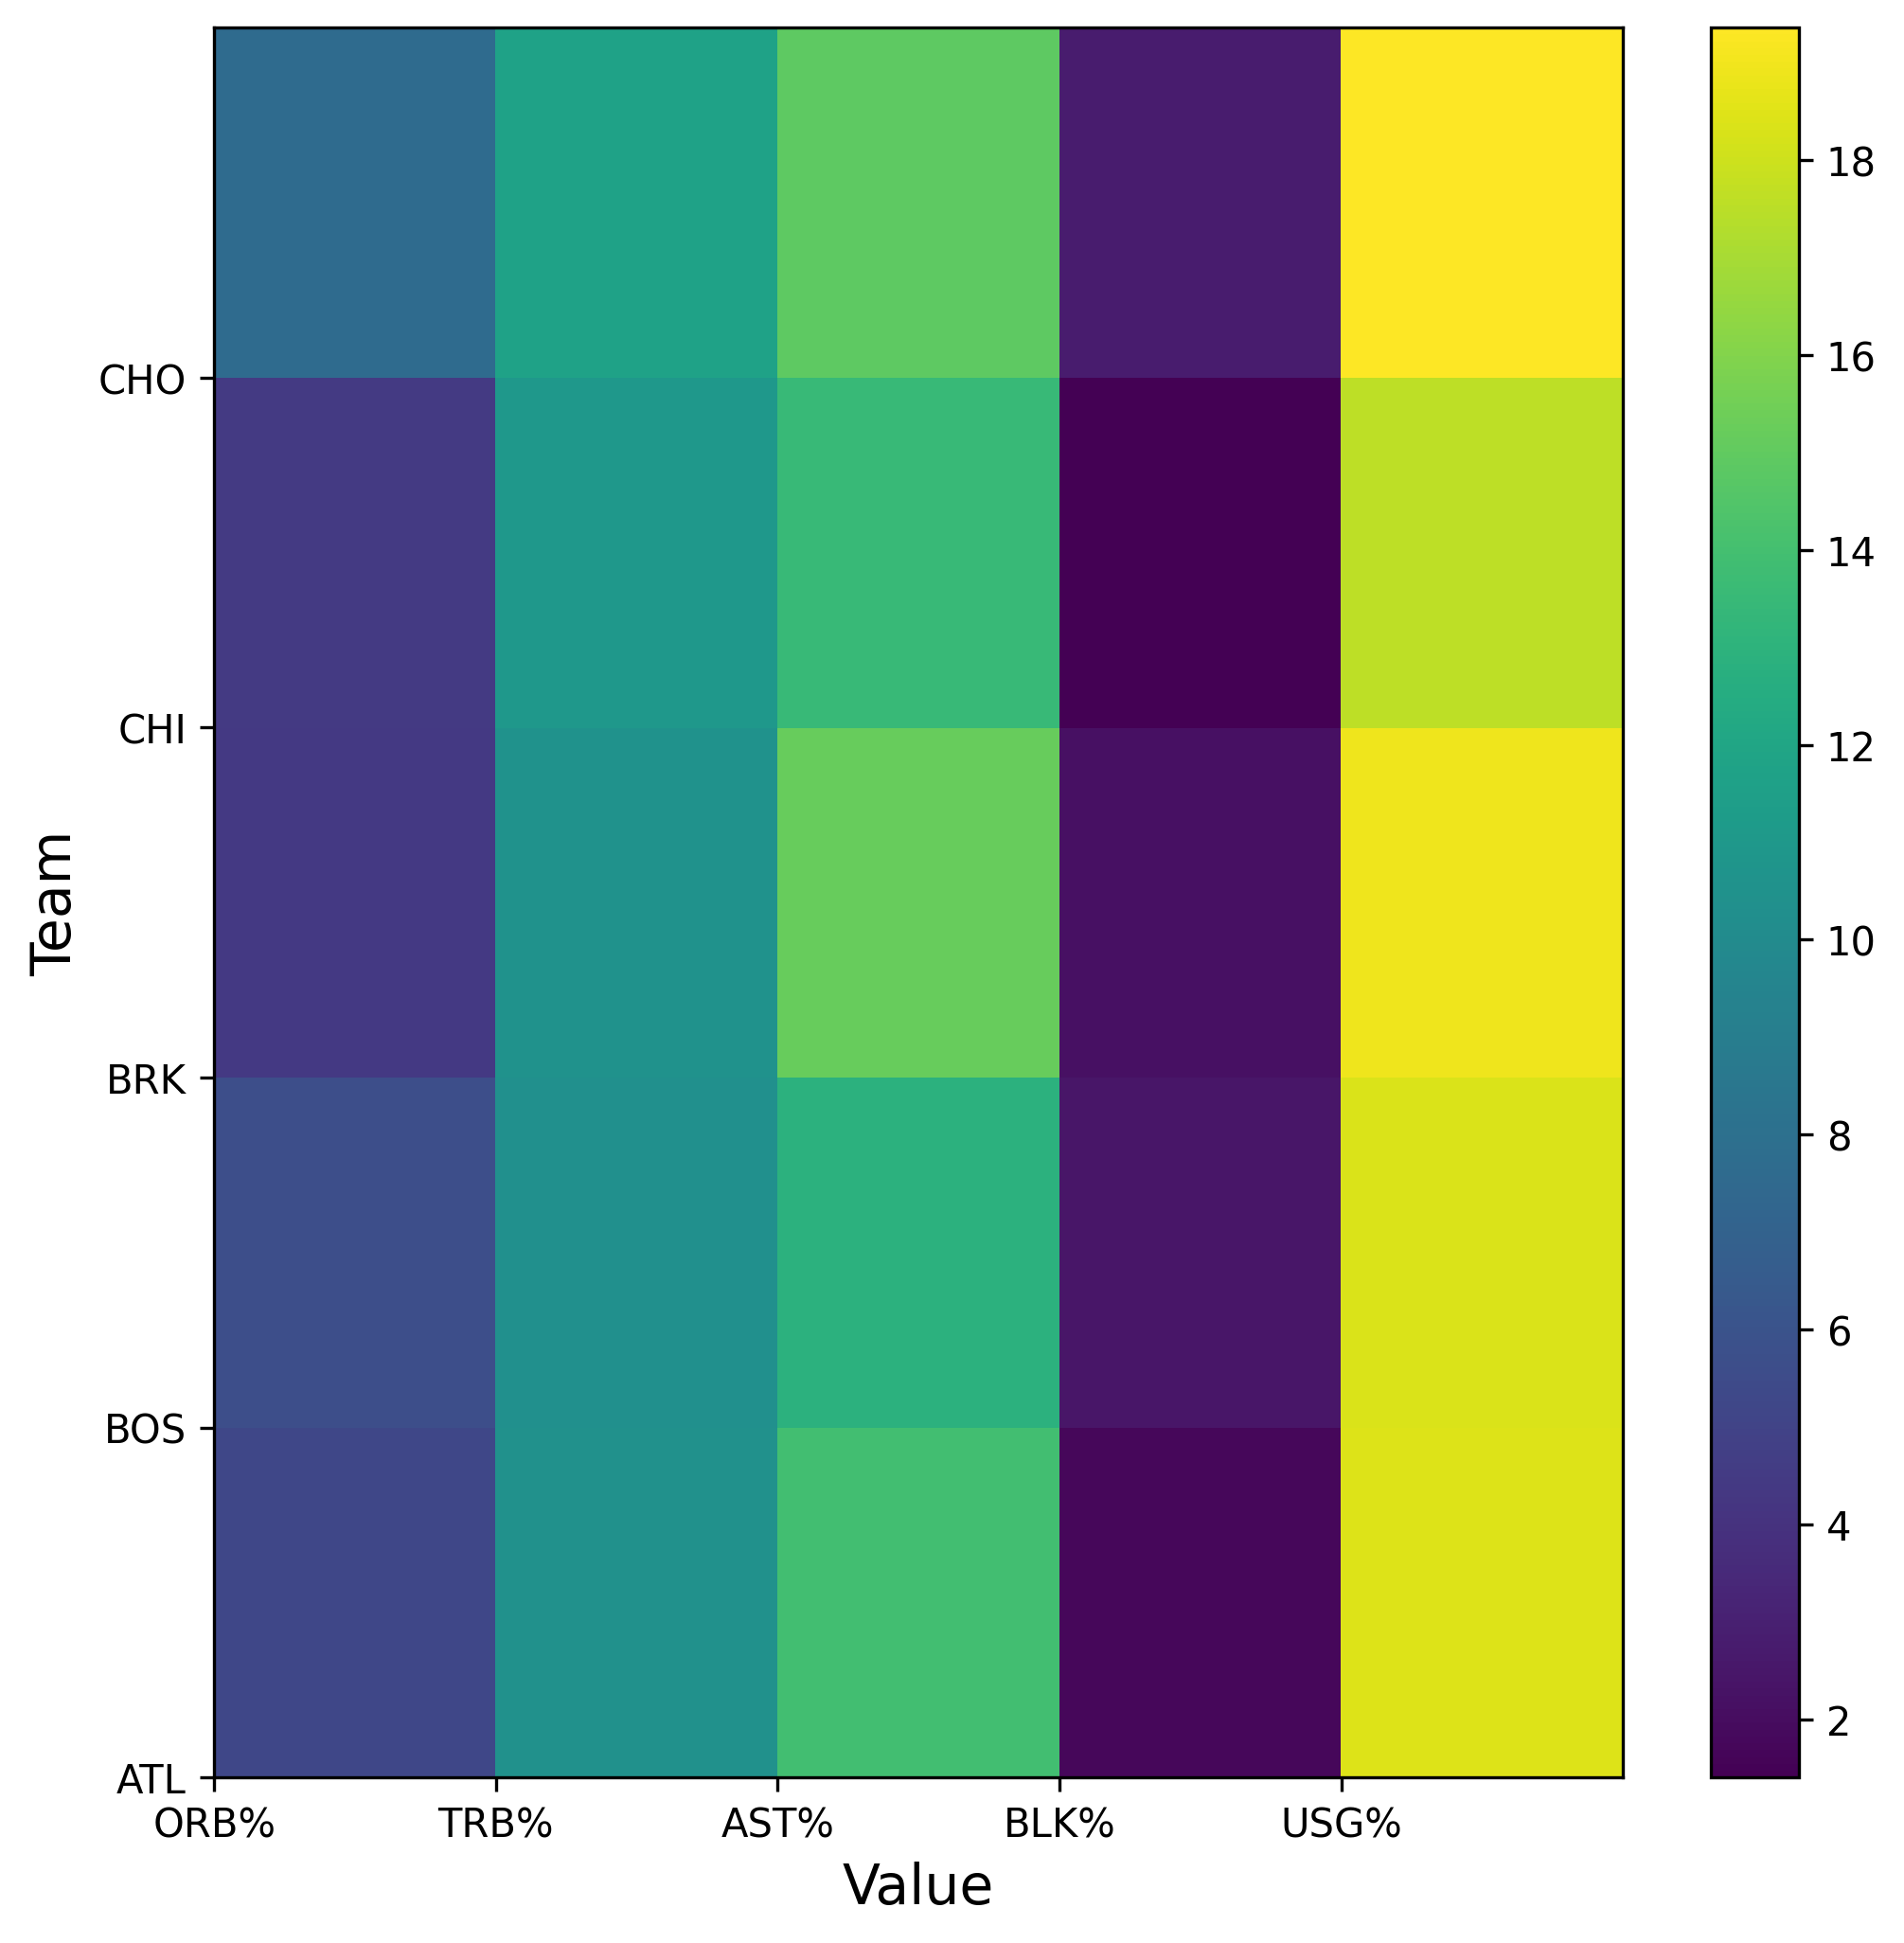

In [11]:
# 히트맵 시각화 V1

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.pcolor(df1.values)

# x축 컬럼 설정
plt.xticks(range(len(df1.columns)),df1.columns) 
# y축 컬럼 설정
plt.yticks(range(len(df1.index)), df1.index)
# x축 레이블 설정
plt.xlabel('Value', fontsize=14)
# y축 레이블 설정
plt.ylabel('Team', fontsize=14) 
plt.colorbar()
plt.show()

In [ ]:
# 히트맵 시각화 V2를 위한 데이터 전처리

# 5개 팀의 선수들만 필터링
df2 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])]

# 팀명, 연령, 참여 게임 수 컬럼만 필터링
df2 = df2[['Tm','Age','G']] # Tm, Age, G 컬럼만 필터링

# 팀 - 연령 기준 평균으로 전처리
df2 = df2.groupby(['Tm','Age']).mean().reset_index() # Tm, Age 컬럼을 기준으로 그룹화하여 평균값 계산

# 테이블 피벗
df2 = df2.pivot(index='Tm', columns='Age', values='G') # Tm을 인덱스로, Age를 컬럼으로, G 값을 피벗
df2

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


In [17]:
df2.columns

Index([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34], dtype='int64', name='Age')

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_28188\3136050022.py:15: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


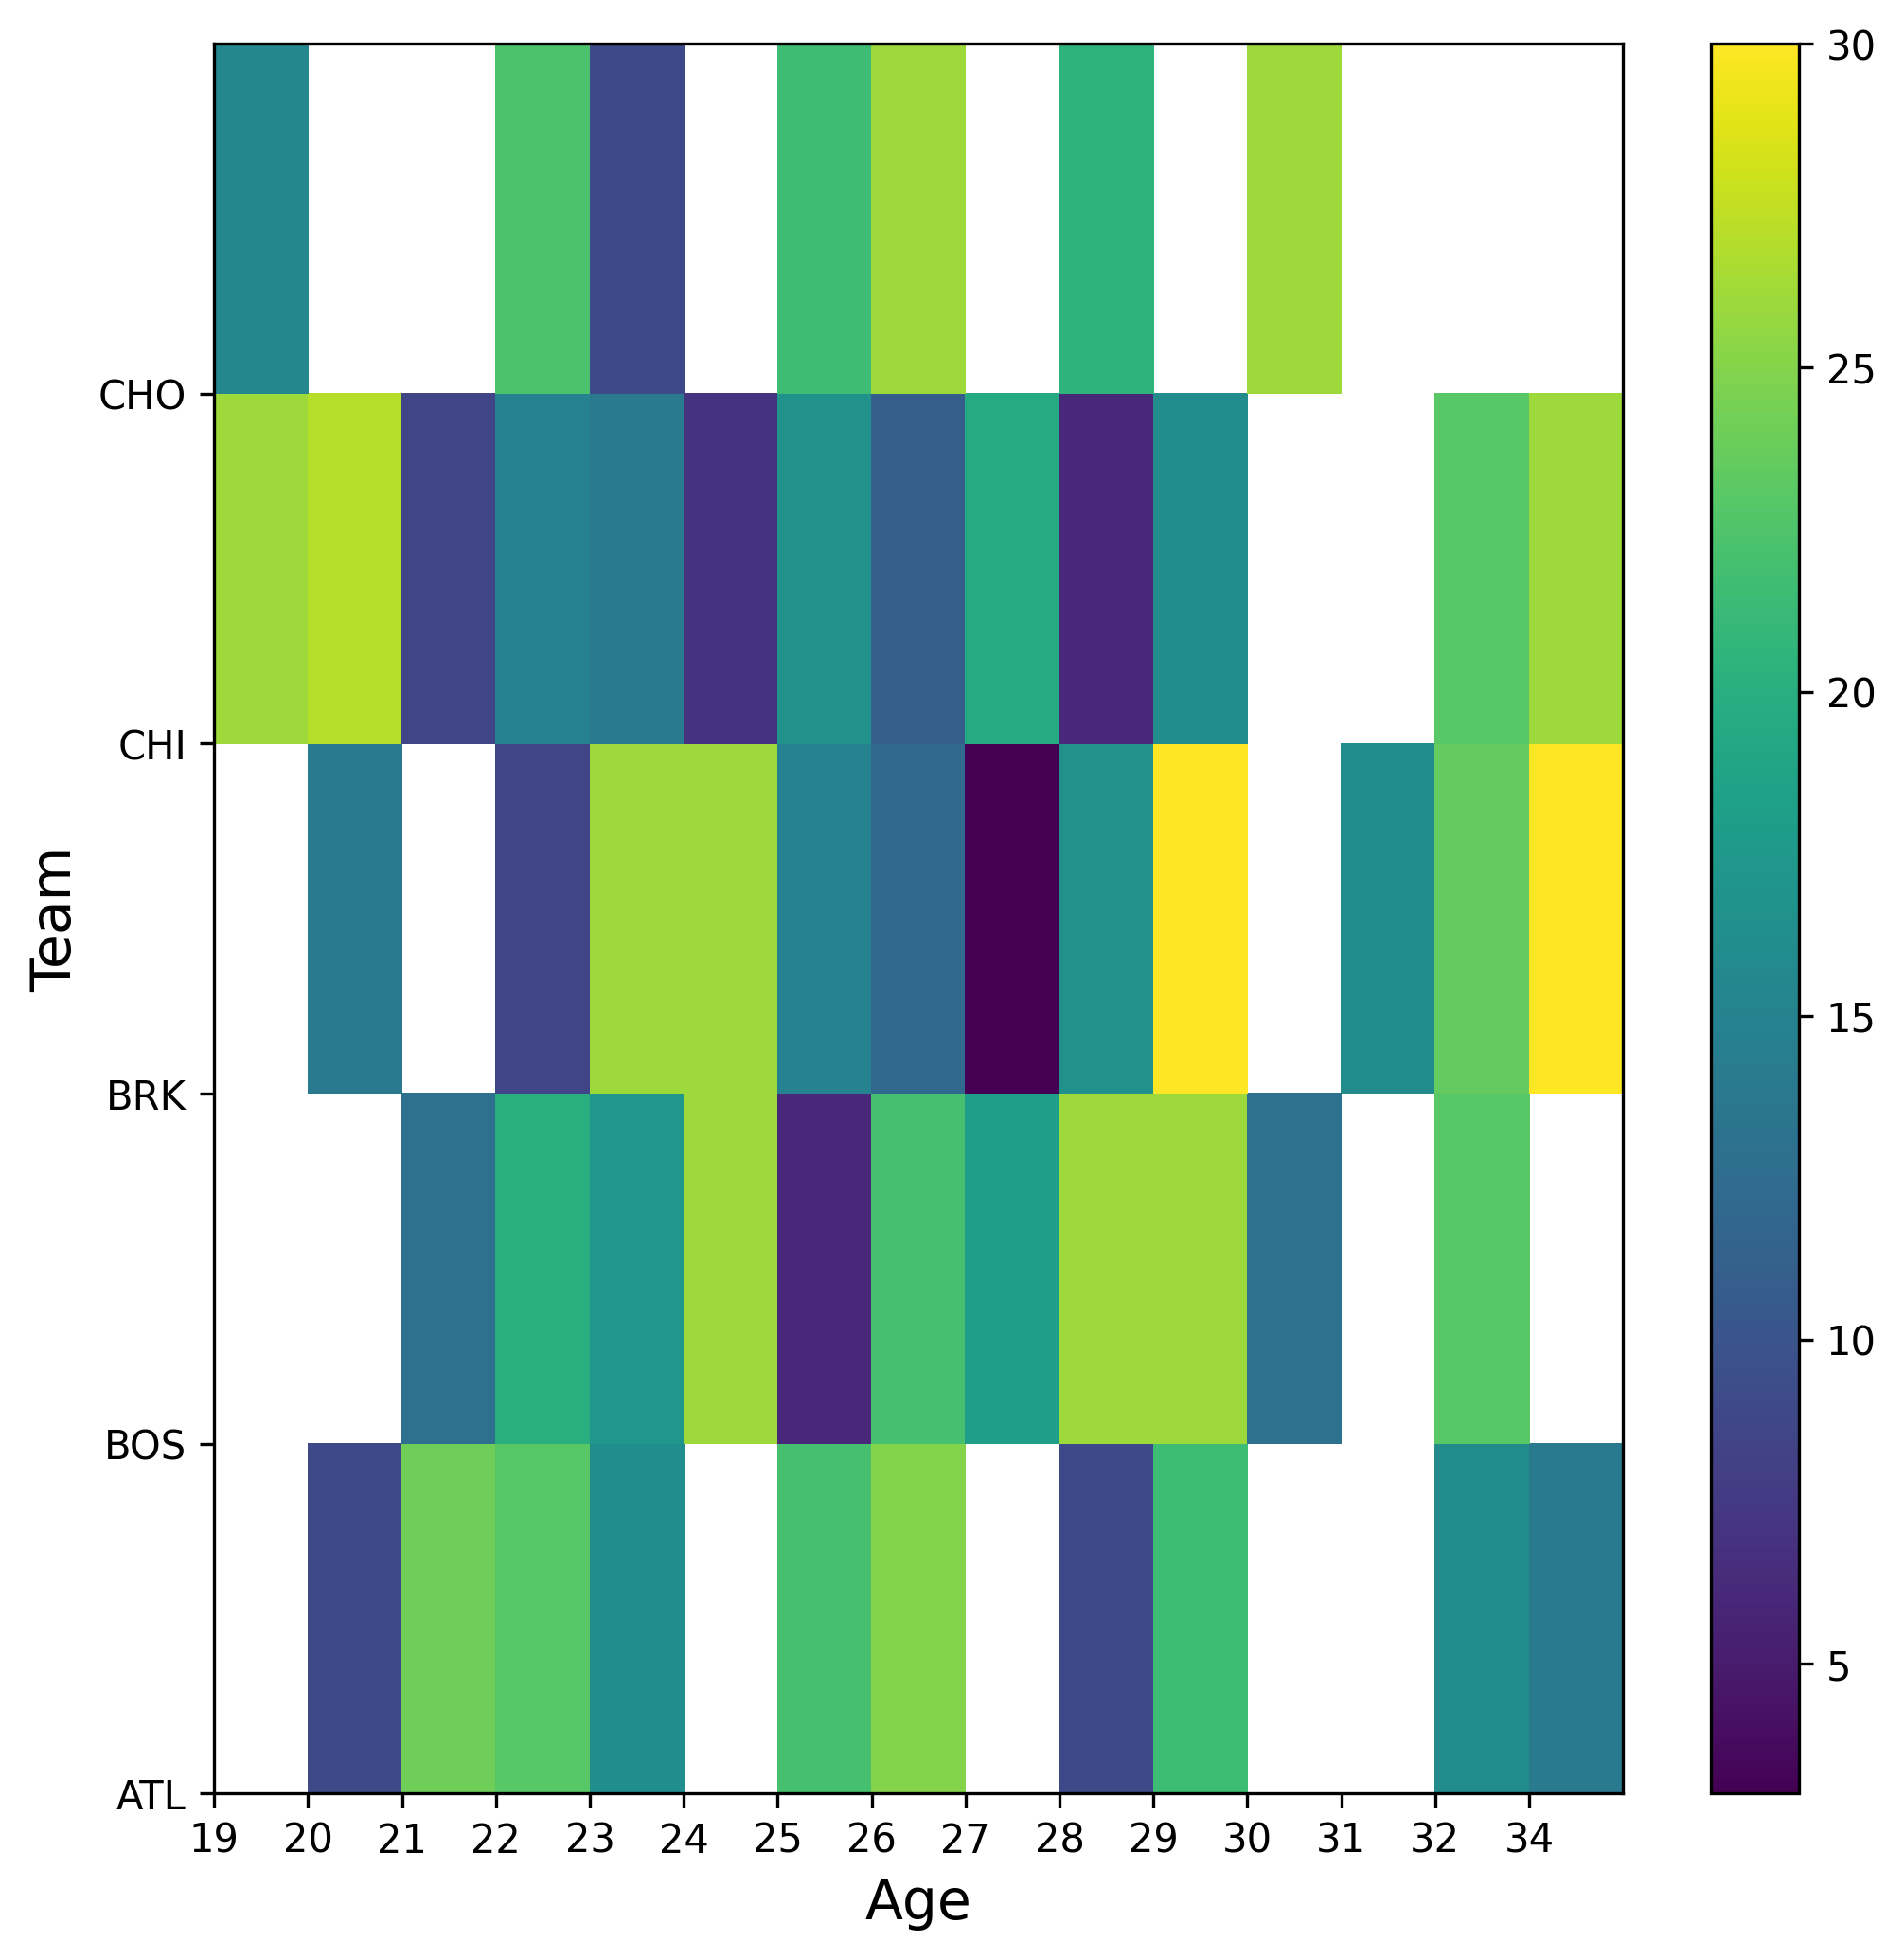

In [ ]:
# 히트맵 시각화 V2

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
plt.pcolor(df2.values)
# x축 컬럼 설정 
plt.xticks(range(len(df2.columns)),df2.columns) # x축 컬럼 설정, 19~ 34세까지의 연령 Age
# y축 컬럼 설정
plt.yticks(range(len(df2.index)), df2.index) # y축 컬럼 설정, ATL, BOS, BRK, CHI, CHO 팀명 TM
# x축 레이블 설정
plt.xlabel('Age', fontsize=14)
# y축 레이블 설정
plt.ylabel('Team', fontsize=14) 
plt.colorbar()
plt.show()

In [18]:
# 방사형 차트를 위한 인덱스 초기화
df3 = df1.reset_index()
df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


In [23]:
for i, row in df3.iterrows():
  print(row)
  

Tm           ATL
ORB%        5.25
TRB%        10.4
AST%    13.89375
BLK%     1.71875
USG%     18.4125
Name: 0, dtype: object
Tm           BOS
ORB%     5.68125
TRB%     10.3625
AST%    12.88125
BLK%      2.4375
USG%      18.325
Name: 1, dtype: object
Tm            BRK
ORB%     4.394737
TRB%    10.547368
AST%    15.210526
BLK%     2.147368
USG%    18.868421
Name: 2, dtype: object
Tm            CHI
ORB%     4.482353
TRB%    10.976471
AST%         13.5
BLK%     1.405882
USG%    17.582353
Name: 3, dtype: object
Tm            CHO
ORB%     7.628571
TRB%    11.742857
AST%         14.9
BLK%     2.764286
USG%    19.357143
Name: 4, dtype: object
